# Ten minutes to plotting

Here is an introduction to some of the basics in plotting data in Python. Another great introduction from `matplotlib`'s documentation is [here](https://matplotlib.org/stable/tutorials/pyplot.html).

First let's load the necessary [modules](https://docs.python.org/3/tutorial/modules.html), taking advantage of shortening things like `matplotlib.pyplot` to be `plt` etc. 

In [1]:
# Load necessary libraries
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np  # Import NumPy for data manipulation
import pandas as pd  # Import Pandas for data handling

# Plotting simple data

Let's say I wrote down some climate data and I'm typing it up as a [list](https://docs.python.org/3/tutorial/datastructures.html):

In [2]:
day = [1, 2, 3, 4, 5]
temp = [60, 65, 68, 61, 58]
humidity = [20, 25, 32, 28, 25]

We can now use the `plt` module we loaded to make a simple plot. You can always [read the docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to understand the arguments that plotting functions take. (And you *find* the docs by searching "matplotlib [function]")

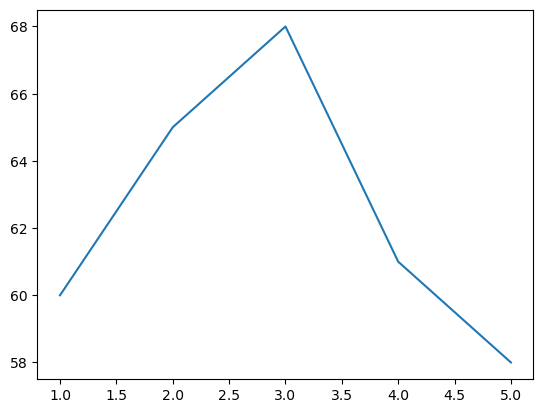

In [3]:
plt.plot(day, temp)

Now try [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)!

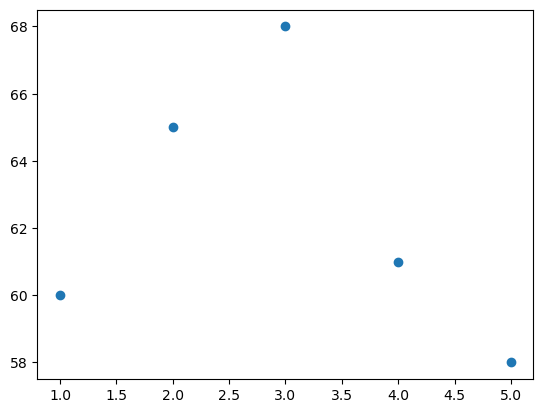

In [4]:
plt.scatter(day, temp)

How about a [bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) plot?

<BarContainer object of 5 artists>

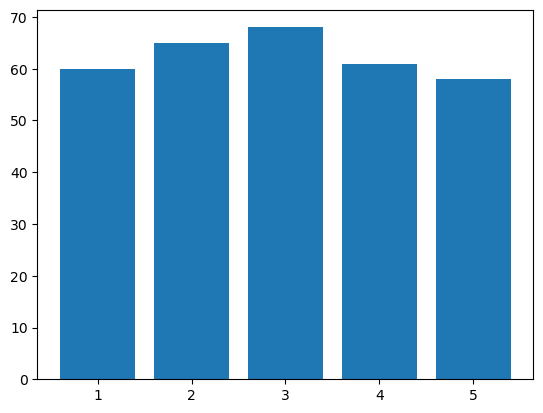

In [5]:
plt.bar(day, temp)

## Using colors

Most plotting functions allow you to specify a `c` axis that colors certain datapoints to be a third data axis for data-rich plots. When you do that you'll want to add a [colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) so your viewers know what they're looking at. 

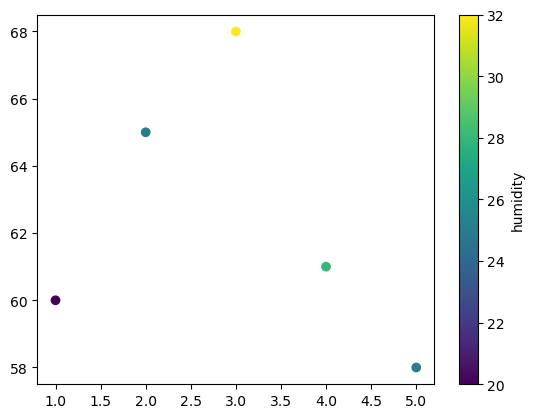

In [6]:
# Specify the "c" keyword to add the humidity data as colors!
plt.scatter(day, temp, c=humidity)

# Call the "colorbar()" class to add a colorbar!
plt.colorbar(label="humidity")

Finally, make sure to label your axes. 

Text(0, 0.5, 'Temperature (°F)')

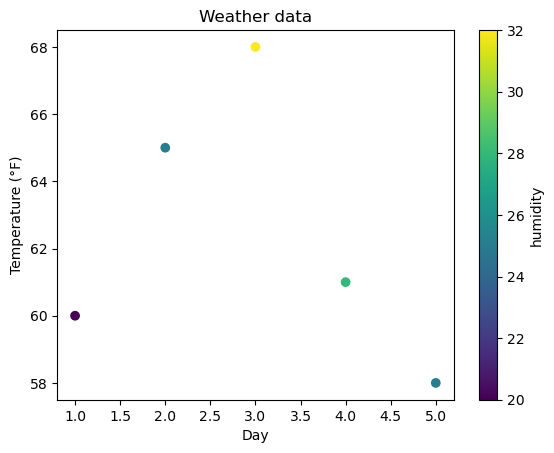

In [7]:
# Specify the "c" keyword to add the humidity data as colors!
plt.scatter(day, temp, c=humidity)

# Call the "colorbar()" class to add a colorbar!
plt.colorbar(label="humidity")

# Set the title of the plot
plt.title('Weather data')

# Label the x-axis
plt.xlabel('Day')

# Label the y-axis
plt.ylabel('Temperature (°F)')

## Numpy arrays

Not much changes if you have [arrays](https://numpy.org/doc/stable/reference/generated/numpy.array.html) instead of lists (you might generate arrays if you need to do math on the lists of numbers.)

For example, if we want to convert our data to celsius: 

In [8]:
temp_c = (temp - 32) * (5/9)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

We have to convert our lists to `numpy` arrays. 

In [9]:
day_arr = np.array(day)
temp_arr = np.array(temp)
humidity_arr = np.array(humidity)

In [10]:
temp_c = (temp_arr - 32) * (5/9)

Text(0, 0.5, 'Temperature (°C)')

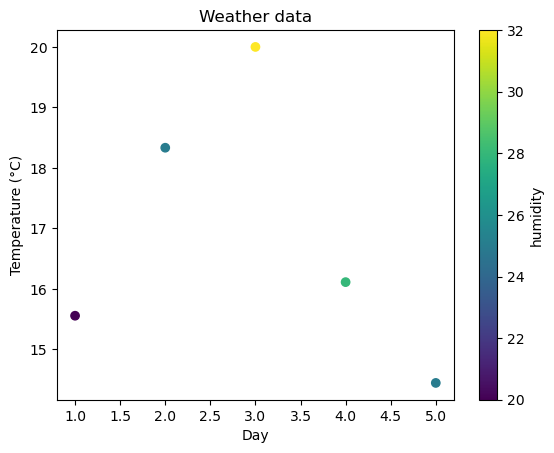

In [11]:
# Specify the "c" keyword to add the humidity data as colors!
plt.scatter(day_arr, temp_c, c=humidity_arr)

# Call the "colorbar()" class to add a colorbar!
plt.colorbar(label="humidity")

# Set the title of the plot
plt.title('Weather data')

# Label the x-axis
plt.xlabel('Day')

# Label the y-axis
plt.ylabel('Temperature (°C)')

# Pandas data

Let's say you want to work with data you found in a [`.csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) file (or any tabular data. If you have an Excel spreadsheet, you can save sheets as a CSV or even [read Excel files directly!](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)). We're going to use [`pandas`](https://pandas.pydata.org/) which we imported as `pd`. Read about how `pandas` works in another source like [this one](https://pandas.pydata.org/docs/user_guide/10min.html).

In [13]:
# Load temperature data from a CSV file

# If you cloned the repo and have this file, you can use this
# weather_data = pd.read_csv('example_data/williamsburg_meteo.csv')

# Otherwise you can load the .csv directly from the repo, if you're in Colab for example
# Sorry if I change the name of the repo or something later...
weather_data = pd.read_csv('https://raw.githubusercontent.com/pycogss/course-geomorph-i/main/example_data/williamsburg_meteo.csv')


# Peek at the data and particularly the column names
weather_data.head()

,STATION,NAME,DATE,PRCP,TMAX,TMIN,TOBS
0,USC00449151,"WILLIAMSBURG 2 N, VA US",1/1/2022,0.03,73,57,69
1,USC00449151,"WILLIAMSBURG 2 N, VA US",1/2/2022,0.74,70,52,52
2,USC00449151,"WILLIAMSBURG 2 N, VA US",1/3/2022,1.86,52,27,27
3,USC00449151,"WILLIAMSBURG 2 N, VA US",1/4/2022,0.00,38,24,30
4,USC00449151,"WILLIAMSBURG 2 N, VA US",1/5/2022,0.01,49,30,47


Let's set some variables

In [21]:
weather_data['datetime'] = pd.to_datetime(weather_data['DATE']) # the pd.to_datetime() just reads the dates as a specific type of data that plots well for time series

date = weather_data['datetime']

temperature = weather_data['TOBS'] # temperature at time of observation

## Using `plt.plot()`

In Matplotlib, both plt.figure() and fig, ax = plt.subplots() are used to create figures for object-oriented plotting, but they have different use cases and behaviors:

`plt.figure()`:

- `plt.figure()` is used to create a single figure object, and it returns a reference to that figure. This figure can contain one or more subplots (Axes).

- When you create plots using `plt.plot()`, `plt.scatter()`, etc., without explicitly specifying an Axes object, Matplotlib will automatically create an Axes within the current figure.

- It is useful when you want to create a single plot without multiple subplots, and you are not concerned about creating multiple axes explicitly.

Here, we will create a `figure` object

Text(0, 0.5, 'Temperature (°C)')

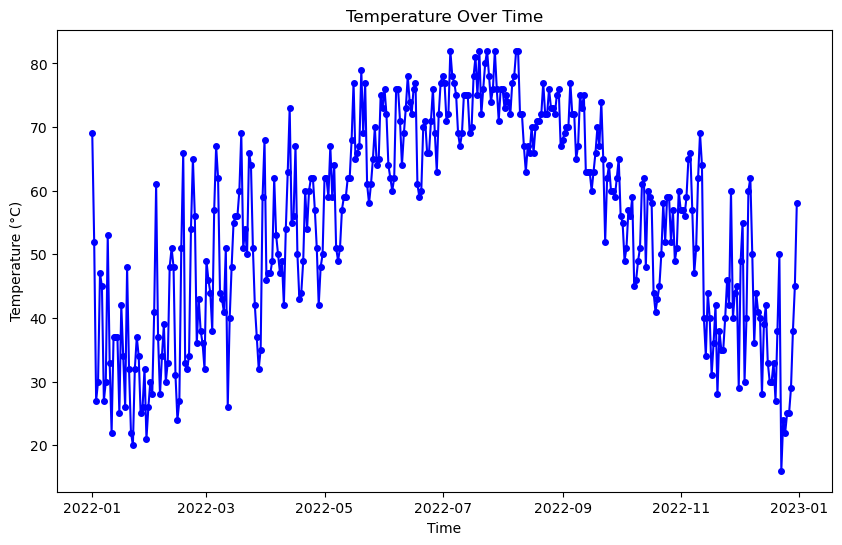

In [22]:
# Create a figure with a specific size (10x6 inches)
plt.figure(figsize=(10, 6))

# Create a line plot using time on the x-axis and temperature on the y-axis
# Customize the plot with blue color, circular markers, solid lines, and marker size
plt.plot(date, temperature, color='blue', marker='o', linestyle='-', markersize=4)

# Set the title of the plot
plt.title('Temperature Over Time')

# Label the x-axis
plt.xlabel('Time')

# Label the y-axis
plt.ylabel('Temperature (°C)')


Note we can do things like [set the limits of axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html):

Text(0, 0.5, 'Temperature (°C)')

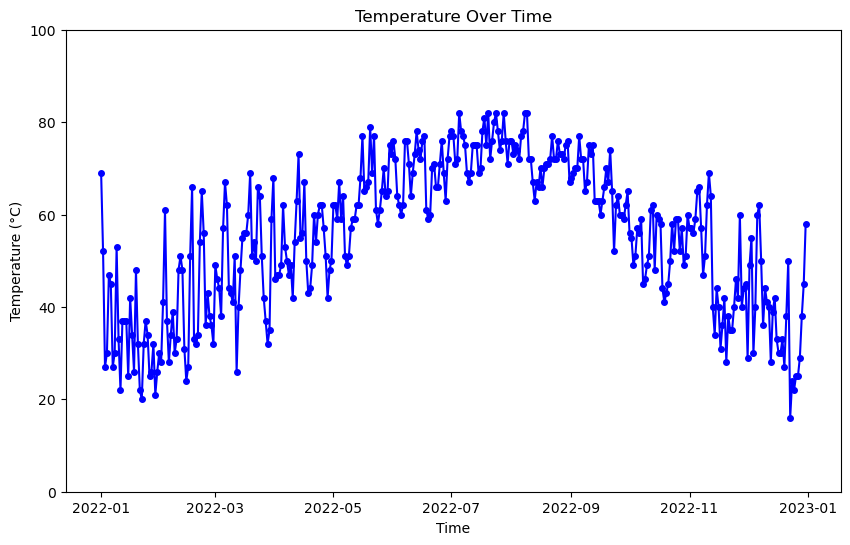

In [23]:
# Create a figure with a specific size (10x6 inches)
plt.figure(figsize=(10, 6))

# Create a line plot using time on the x-axis and temperature on the y-axis
# Customize the plot with blue color, circular markers, solid lines, and marker size
plt.plot(date, temperature, color='blue', marker='o', linestyle='-', markersize=4)

# Set the title of the plot
plt.title('Temperature Over Time')

# Label the x-axis
plt.xlabel('Time')

# Set axis limits from 0 to 100
plt.ylim(0, 100)

# Label the y-axis
plt.ylabel('Temperature (°C)')

## Using `ax` objects

In contrast, we can use `fig, ax = plt.subplots()`:

- Multiple Subplots: `plt.subplots()` is used to create a figure (Fig) and one or more subplots (Axes) within that figure. It returns both the figure and an array of Axes objects.

- Explicit Axes: You explicitly create and specify the Axes objects when using `fig, ax = plt.subplots()`. This allows you to have more control over the placement and arrangement of subplots.

- Usage: It is useful when you need to create multiple subplots within a single figure, such as creating a grid of plots.

A main difference is that the syntax for customizing `ax` objects will often include "`set_`" as in `set_xlabel()` as opposed to just `plt.xlabel()`

But you don't need to create multiple plots if you don't want to:

Text(0, 0.5, 'Temperature (°C)')

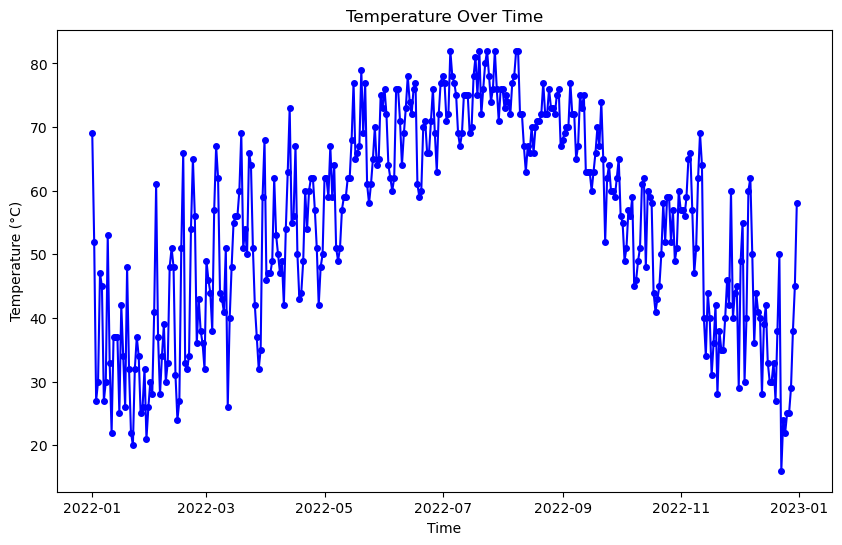

In [25]:
# Create a fig and ax object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot something on the ax object
ax.plot(date, temperature, color='blue', marker='o', linestyle='-', markersize=4)

# Set the title of the axis
ax.set_title('Temperature Over Time')

# Label the x-axis
ax.set_xlabel('Time')

# Label the y-axis
ax.set_ylabel('Temperature (°C)')


Let's add a second plot

In [26]:
high_temp = weather_data['TMAX'] 

low_temp = weather_data['TMIN'] 

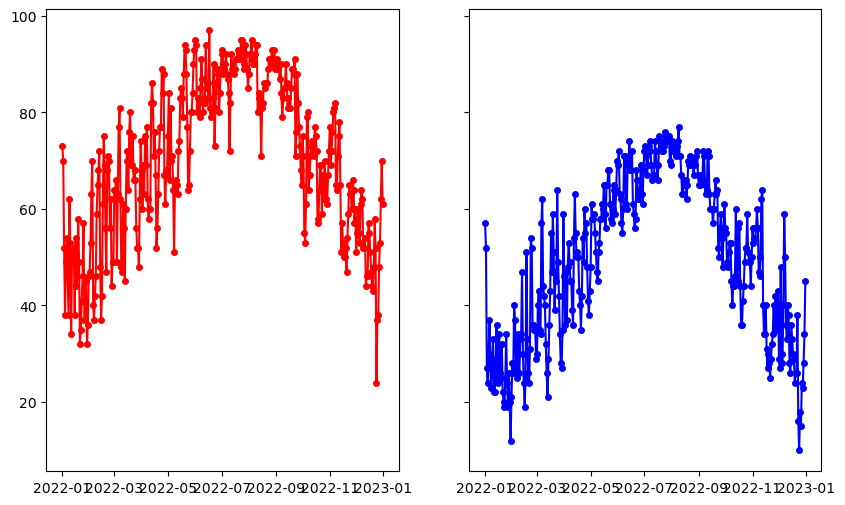

In [27]:
#Create a fig and ax object
fig, ax = plt.subplots(1,2, figsize=(10,6), sharey=True)

# Now you have an ax object that has two objects in it
# ax[0] is the zeroeth (first) element, ax[1] is the first element, etc. 

# Plot something on the ax object
ax[0].plot(date, high_temp,  color='red', marker='o', linestyle='-', markersize=4)

# Plot something on the ax object
ax[1].plot(date, low_temp,  color='blue', marker='o', linestyle='-', markersize=4)

# # Set the title of the axis
# ax.set_title('Temperature Over Time')

# # Label the x-axes
# ax.set_xlabel('Time')

# # Label the y-axis
# ax.set_ylabel('Temperature (°C)')


Or put them on the same axis:

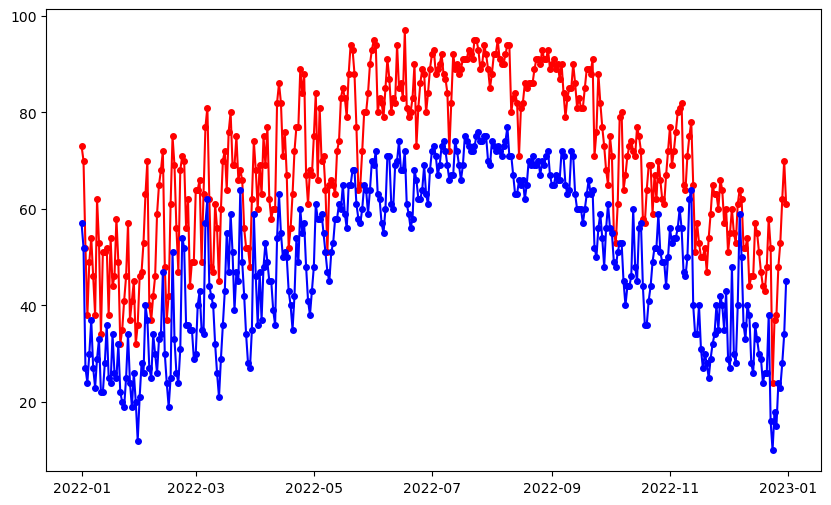

In [28]:
# Create a fig and ax object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot something on the ax object
ax.plot(date, high_temp, color='red', marker='o', linestyle='-', markersize=4)
ax.plot(date, low_temp, color='blue', marker='o', linestyle='-', markersize=4)

Or add a secondary dataset as a "color" option in your plot! Just change your plot type to "scatter" (if you want you can put the lines on in the background)

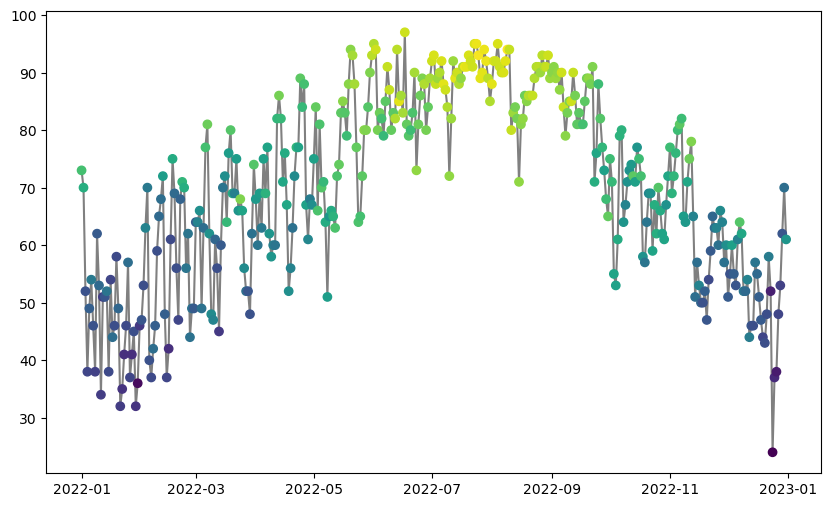

In [29]:
# Create a fig and ax object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot something on the ax object
ax.plot(date, high_temp, color='gray', linestyle='-', zorder=0)
ax.scatter(date, high_temp, c=low_temp, marker='o', linestyle='-', zorder=1)

## Using `pandas`' built-in plotting functions

`pandas` actually has its own [plotting functions](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) that use a slightly different syntax for quick visualization of data.

You can see below that the syntax is `[name of the data frame].plot.[type of plot]` for something like a [scatterplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html).

<AxesSubplot: title={'center': 'Example Plot'}, xlabel='datetime', ylabel='TMAX'>

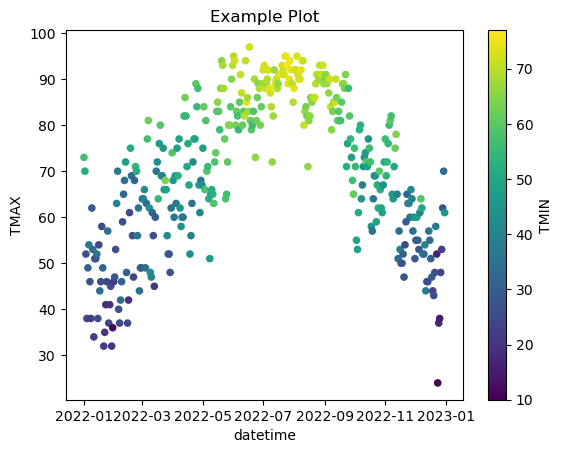

In [30]:
# Use the built-in plot() function to create a line plot
weather_data.plot.scatter(x='datetime', y='TMAX', c='TMIN', title='Example Plot', marker='o', cmap='viridis')

You can specify the `ax` object to plot on for maximum customization of axes!

Text(0.5, 0, 'Date')

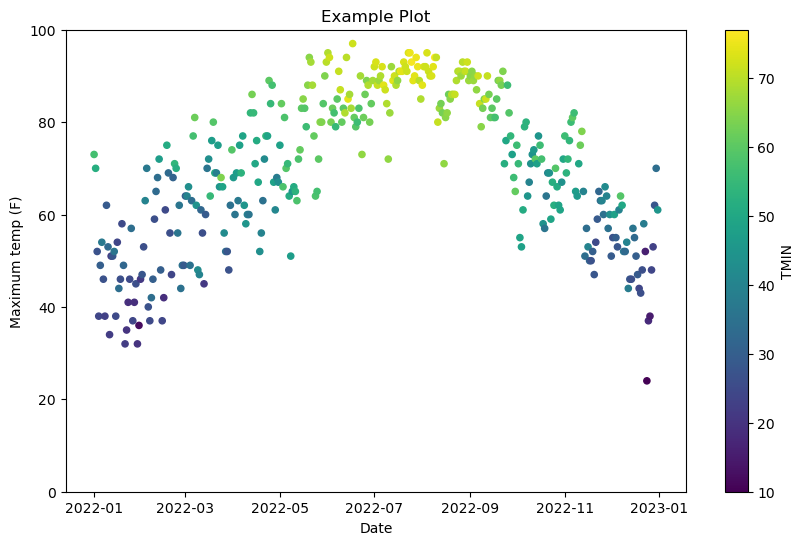

In [32]:
# Create a fig and ax object
fig, ax = plt.subplots(figsize=(10, 6))

# Use the built-in plot() function to create a line plot
weather_data.plot.scatter(x='datetime', y='TMAX', c='TMIN', title='Example Plot', marker='o', cmap='viridis', ax=ax)

ax.set_ylim(0, 100)

ax.set_ylabel('Maximum temp (F)')

ax.set_xlabel('Date')

## Colorbar and colormap customization

Now bring it all together!

Text(0.5, 0, 'Date')

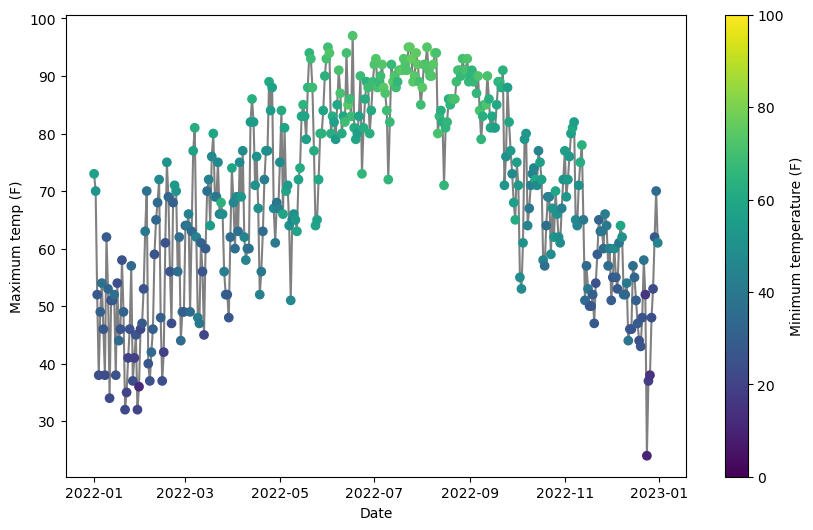

In [33]:
# Create a fig and ax object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot something on the ax object
# zorder tells the program what order to plot objects in
ax.plot(date, high_temp, color='gray', linestyle='-', zorder=0)

# One way to do it is to name a variable the ax object's plot
# I am also specifying a "vmin" and "vmax" which are the maximum and minimum values for the colorbar
scatterplot = ax.scatter(date, high_temp, c=low_temp, marker='o', linestyle='-',
                         vmin=0, 
                          vmax=100,
                            zorder=1)

# Customize the colorbar by specifying the variable name for the axis object
colorbar = plt.colorbar(scatterplot, ax=ax)
colorbar.set_label('Minimum temperature (F)')  # Set the label for the colorbar

ax.set_ylabel('Maximum temp (F)')

ax.set_xlabel('Date')


# Next steps

To make some truly beautiful and data-rich plots I recommend checking out [`seaborn`](https://seaborn.pydata.org/tutorial/introduction.html), another plotting package built on `matplotlib` that plays nicely with `pandas` data.